<a href="https://colab.research.google.com/github/AlexanderWangY/MNIST_from_Scratch/blob/main/MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import tensorflow as tf
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(xx_train, yy_train), (xx_test, yy_test) = tf.keras.datasets.mnist.load_data()

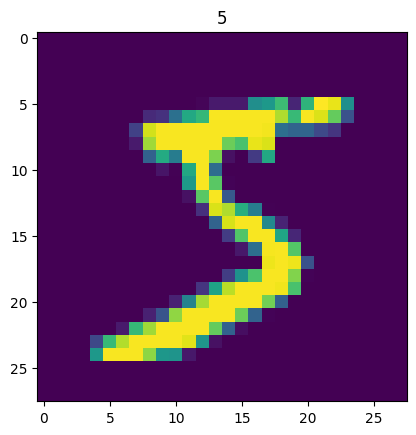

In [ ]:
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

In [ ]:
# Flatten and normalize training and testing data to be between 0 and 1
x_train = x_train.reshape((60000, -1)) / 255.0
x_test = x_test.reshape((10000, -1)) / 255.0

# One hot encode training truth values for comparison (no need for validation as we will test with integer)
OH_y = np.eye(10)[y_train]

In [ ]:
# Let's initilaize the weights randomly
W = np.random.rand(784, 10)
W

array([[0.24515113, 0.58534445, 0.6341627 , ..., 0.07131101, 0.81146381,
        0.72984331],
       [0.54064842, 0.15613995, 0.04942956, ..., 0.80260002, 0.60588705,
        0.10977945],
       [0.75820016, 0.8927823 , 0.32093591, ..., 0.05600363, 0.34016058,
        0.02938561],
       ...,
       [0.05765529, 0.43718171, 0.81497093, ..., 0.235981  , 0.49385301,
        0.15974325],
       [0.76957733, 0.95402537, 0.30884549, ..., 0.22289326, 0.64925083,
        0.20216013],
       [0.26995645, 0.65202933, 0.67154364, ..., 0.68298697, 0.11657893,
        0.11130898]])

In [ ]:
# Convert everything to a tensor
x_train = torch.tensor(x_train)
y_train = torch.tensor(OH_y)
W = torch.tensor(W)
x_test = torch.tensor(x_test)
OH_y = torch.tensor(OH_y)
y_test = torch.tensor(y_test)

In [ ]:
# Activate gradient tracking for weights
W.requires_grad_()

tensor([[0.2452, 0.5853, 0.6342,  ..., 0.0713, 0.8115, 0.7298],
        [0.5406, 0.1561, 0.0494,  ..., 0.8026, 0.6059, 0.1098],
        [0.7582, 0.8928, 0.3209,  ..., 0.0560, 0.3402, 0.0294],
        ...,
        [0.0577, 0.4372, 0.8150,  ..., 0.2360, 0.4939, 0.1597],
        [0.7696, 0.9540, 0.3088,  ..., 0.2229, 0.6493, 0.2022],
        [0.2700, 0.6520, 0.6715,  ..., 0.6830, 0.1166, 0.1113]],
       dtype=torch.float64, requires_grad=True)

In [ ]:
# Ensure proper sizes for matrix multiplication
x_train.shape, W.shape

(torch.Size([60000, 784]), torch.Size([784, 10]))

In [ ]:
soft = torch.nn.Softmax(dim=1)

# Calculating predictions and activating with Softmax
def calc_preds(X, W):
  return soft(X @ W)

# Calculating the loss value
def calc_loss(X, Y, W):
  return torch.abs(Y - calc_preds(X, W)).mean()

# Validating our accuracy as we train using the validation set!
def validate(X_test, Y_test, weights):
  preds = torch.argmax((calc_preds(X_test, weights) > 0.5).float(), dim=1)

  num_correct = torch.sum(preds == Y_test)

  print(f'Accuracy: {(num_correct / X_test.shape[0] * 100):.2f}%')

  return num_correct / X_test.shape[0] * 100.0

def train(X_train, Y_train, W, X_test, Y_test, epochs, learning_rate):

  # For training progress graphs @ the end (LOE -> Loss over epoch) (AOE -> Accuracy over epoch)
  LOE_Y = []
  AOE_Y = []

  for e in range(epochs):

    # Forward propogation + MAE Loss calculation
    loss = calc_loss(X_train, Y_train, W)
    LOE_Y.append(round(loss.item(), 6))

    loss.backward()

    # Backpropogation
    with torch.no_grad():
      W.sub_(W.grad * learning_rate)
      W.grad.zero_()

    # Validation!
    print(f"Epoch {e}: ", end="")
    AOE_Y.append(validate(X_test, Y_test, W))

  # Let's graph our models progress
  x_axis = np.arange(epochs)
  fig, axes = plt.subplots(1, 2, figsize=(6, 3))

  # For LOE
  axes[0].plot(x_axis, LOE_Y)
  axes[0].set_title("Loss over Epocs")
  axes[0].set_xlabel("Epoch")
  axes[0].set_ylabel("Loss")

  axes[1].plot(x_axis, AOE_Y)
  axes[1].set_title("Accuracy over Epocs")
  axes[1].set_xlabel("Epoch")
  axes[1].set_ylabel("Accuracy %")

  plt.tight_layout()

  plt.show()




Epoch 0: Accuracy: 21.66%
Epoch 1: Accuracy: 30.05%
Epoch 2: Accuracy: 35.74%
Epoch 3: Accuracy: 38.69%
Epoch 4: Accuracy: 40.26%
Epoch 5: Accuracy: 41.29%
Epoch 6: Accuracy: 42.29%
Epoch 7: Accuracy: 42.94%
Epoch 8: Accuracy: 43.74%
Epoch 9: Accuracy: 44.11%
Epoch 10: Accuracy: 44.51%
Epoch 11: Accuracy: 44.84%
Epoch 12: Accuracy: 45.21%
Epoch 13: Accuracy: 45.39%
Epoch 14: Accuracy: 45.59%
Epoch 15: Accuracy: 45.84%
Epoch 16: Accuracy: 46.05%
Epoch 17: Accuracy: 46.14%
Epoch 18: Accuracy: 46.26%
Epoch 19: Accuracy: 46.37%
Epoch 20: Accuracy: 46.50%
Epoch 21: Accuracy: 46.62%
Epoch 22: Accuracy: 46.79%
Epoch 23: Accuracy: 47.08%
Epoch 24: Accuracy: 47.43%
Epoch 25: Accuracy: 47.75%
Epoch 26: Accuracy: 48.34%
Epoch 27: Accuracy: 48.79%
Epoch 28: Accuracy: 49.18%
Epoch 29: Accuracy: 49.62%
Epoch 30: Accuracy: 50.41%
Epoch 31: Accuracy: 51.16%
Epoch 32: Accuracy: 51.85%
Epoch 33: Accuracy: 52.40%
Epoch 34: Accuracy: 52.79%
Epoch 35: Accuracy: 53.27%
Epoch 36: Accuracy: 53.82%
Epoch 37: A

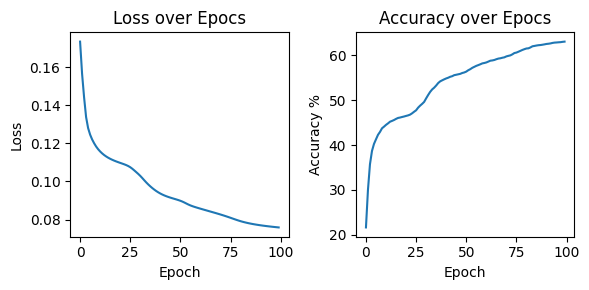

In [ ]:
# Train our "model" (more like training the weights LOL)
train(x_train, y_train, W, x_test, y_test, 100, 30)